# THE SPARKS FOUNDATION 
## TASK 1 (DATA SCIENCE AND BUSSINESS ANALYTICS)
### BY AMRISHA SINGH 

TASK - Predict the percentage of an student based on the no. of study hours.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [4]:
url =  "http://bit.ly/w-data"
data = pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


The data can we also imported as -

url = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

data = pd.read_csv(url)

s_data.head(5)

### EXPLORATORY DATA ANALYSIS -

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### DATA VISUALIZATION - 

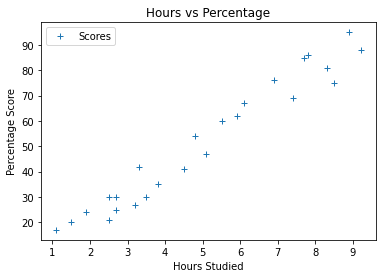

In [9]:
data.plot(x='Hours', y='Scores', style='+')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

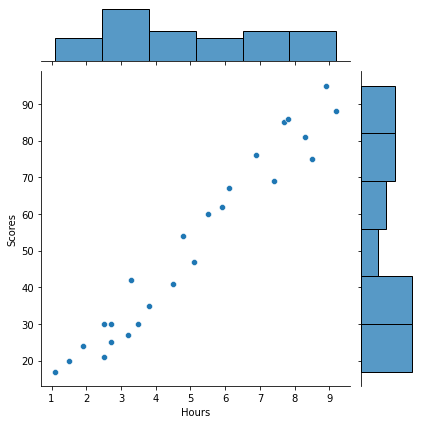

In [10]:
sns.jointplot(x = "Hours", y="Scores", data = data)

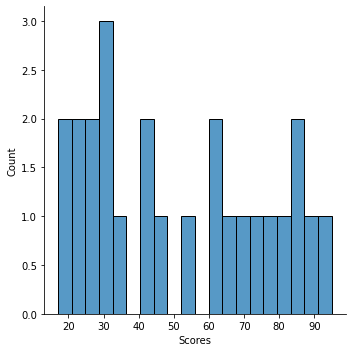

In [11]:
sns.displot(data, x = 'Scores', bins = 20)
plt.show()

### DATA PREPROCESSING -

Divide the data into attributes(inputs) and labels(outputs)

In [12]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values


### MODEL TRAINING -

Spiltting the data into training and testing sets

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size=0.2)
print("X train.shape =", X_train.shape)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


TRAINING SET - 

In [14]:
training = LinearRegression()  
training.fit(X_train, Y_train) 
print("Training completed")

Training completed


VISULAIZING TRAINING SET RESULT - 

In [15]:
Y0 = training.intercept_ + training.coef_*X_train

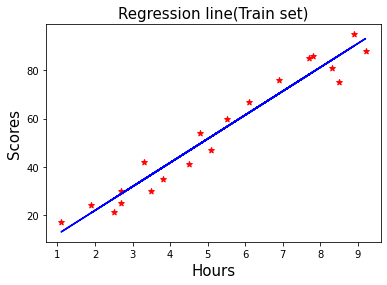

In [16]:
plt.scatter(X_train,Y_train,color='red',marker='*')
plt.plot(X_train,Y0,color='blue')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=15)
plt.show()

TEST SET - 

In [17]:
Y_pred=training.predict(X_test)
print(Y_pred)
print(X_test)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


VISUALIZING TEST SET RESULT -

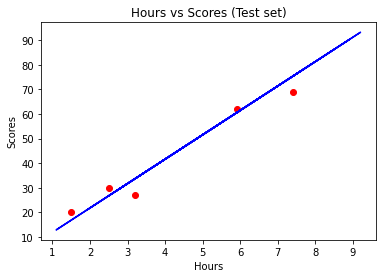

In [18]:
plt.scatter(X_test, Y_test, color = 'RED')
plt.plot(X_train, training.predict(X_train), color= 'blue')
plt.title('Hours vs Scores (Test set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### COMPARING ACTUAL RESULT TO THE PREDICTED RESULT - 

In [19]:
Y_test1 = list(Y_test)
prediction=list(Y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test1,'Result':prediction})
df_compare

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
print("Training Score:",training.score(X_train,Y_train))
print("Test Score:",training.score(X_test,Y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


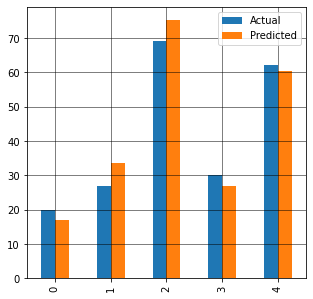

In [21]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred}) 
df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='black')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

### MODEL EVALUATION - 

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-2:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356


### PREDICTING FUTURE DATA - 

In [23]:
Hours = 9.25
prediction = training.predict([[Hours]])
print("Number of Hours = {}".format(Hours))
print("Predicted Score = {}".format(prediction[0]))

Number of Hours = 9.25
Predicted Score = 93.69173248737538


## FROM THE ABOVE RESULT IT CAN BE CONCLUDED THAT IF THE STUDENT STUDIES FOR 9.25 HOURS, S/HE WILL SCORE 93.69173248737538 

# TASK 1 COMPLETED 